In [663]:
%pip install pymystem3

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [665]:
import torch
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

In [666]:
import string
import pandas as pd
import torch
import natasha
from razdel import tokenize, sentenize
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import digits
from pymystem3 import Mystem
mystem = Mystem()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [664]:
%pip install natasha

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [674]:
ds = pd.read_csv('/home/jupyter/mnt/s3/newbacketttt/train.csv')

In [675]:
ds.head()

,Unnamed: 0,sentence,1category,2category,sentiment
0,4754,При этом всегда получал качественные услуги.,Communication,NaN,+
1,4417,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−
2,3629,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−
3,11640,Отвратительное отношение к клиентам.,Communication,NaN,−
4,5571,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+


## Preprocessing

In [676]:
ds = ds.drop('2category', axis = 1)

In [677]:
ds = ds.rename(columns = {'Unnamed: 0': 'id'})

In [678]:
# target = ds[['1category','sentiment']]
trg_cat = ds['1category']
trg_sent = ds['sentiment']

trg_cat_dum = pd.get_dummies(trg_cat)
trg_cat_dum = pd.get_dummies(trg_sent)

In [347]:
trg_cat_dum

,+,?,−
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
19356,0,0,1
19357,0,0,1
19358,1,0,0
19359,1,0,0


In [679]:
df = ds['sentence'].copy()

In [349]:
df.head(10)

0         При этом всегда получал качественные услуги.
1    Не вижу, за что хотя бы 2 поставить, сервис на 1!
2         Вот так "Мой любимый" банк МКБ меня обманул.
3                 Отвратительное отношение к клиентам.
4    Всегда в любое время дня и ночи помогут, ответ...
5      Все время согласовывалось, всё делалось быстро.
6    Абсолютное бездействие и нежелание банка работ...
7    Первая операция на внесение 122 000 руб. была ...
8    Ну почему я опять должен звонить и платить ден...
9    Получив карту "Кредит в кармане" и две бесплат...
Name: sentence, dtype: object

## Delete punctuation

In [680]:
def delete_punc(df):
    for i in range(df.shape[0]):
        text = df.loc[i]
        text_new = text.translate (str.maketrans('', '', string.punctuation))
        df.loc[i] = text_new
    return df

In [681]:
df_no_punc = delete_punc(df)

In [352]:
df.head(10)

0          При этом всегда получал качественные услуги
1       Не вижу за что хотя бы 2 поставить сервис на 1
2            Вот так Мой любимый банк МКБ меня обманул
3                  Отвратительное отношение к клиентам
4    Всегда в любое время дня и ночи помогут ответя...
5        Все время согласовывалось всё делалось быстро
6    Абсолютное бездействие и нежелание банка работ...
7    Первая операция на внесение 122 000 руб была у...
8    Ну почему я опять должен звонить и платить ден...
9    Получив карту Кредит в кармане и две бесплатны...
Name: sentence, dtype: object

## Delete stopwords

In [682]:
def del_stopwords(df):
    for i in range(df.shape[0]):
        text = df.loc[i]
        text = text.split()
        text_filtered = " ".join([word for word in text if word not in stopwords.words('russian')])
        df.loc[i] = text_filtered.lower()
    return df

In [683]:
df_filtered = del_stopwords(df_no_punc).copy()

In [355]:
df_filtered.head()

0                      при получал качественные услуги
1                    не вижу хотя 2 поставить сервис 1
2                     вот мой любимый банк мкб обманул
3                    отвратительное отношение клиентам
4    всегда любое время дня ночи помогут ответят решат
Name: sentence, dtype: object

## Delete digits

In [688]:
import re

In [689]:
def del_digits(df):
    for i in range(df.shape[0]):
        text = df.loc[i].split()
        text_filtered = [word for word in text if word not in digits]
        text_filtered = " ".join([re.sub('[0-9]', '', i) for i in text_filtered])
        df.loc[i] = text_filtered
    return df

In [690]:
df_no_dig = del_digits(df_filtered).copy() 

In [358]:
df_no_dig.head()

0                      при получал качественные услуги
1                        не вижу хотя поставить сервис
2                     вот мой любимый банк мкб обманул
3                    отвратительное отношение клиентам
4    всегда любое время дня ночи помогут ответят решат
Name: sentence, dtype: object

# Lemmatization

In [691]:
def lemmatizing(df, lemmatizer):
    for i in range(df.shape[0]):
        text = df.loc[i]
        text_lemm = mystem.lemmatize(text)
        text_lemm = "".join(text_lemm)
#         text = text.split()
#         text_stem = ' '.join(list(map(lambda x: lemmatizer.lemmatize(x), text)))
        text_lemm = text_lemm.replace('\n',"")
        df.loc[i] = text_lemm
    return df

In [692]:
df_lemmatized = lemmatizing(df_no_dig, WordNetLemmatizer()).copy()

In [370]:
df_lemmatized.head()

0                     при получать качественный услуга
1                     не видеть хотя поставлять сервис
2                  вот мой любимый банк мкб обманывать
3                      отвратительный отношение клиент
4    всегда любой время день ночь помогать отвечать...
Name: sentence, dtype: object

## Tokenization

In [693]:
def tokenization(df):
    for i in range(df.shape[0]):
        text = str(df.loc[i])
        tokens = list(tokenize(text))
        text_tokenized = [_.text for _ in tokens]
        df.loc[i] = text_tokenized
    return df

In [694]:
df_tokenized = tokenization(df_lemmatized).copy()

In [385]:
df_tokenized.head()

0                [при, получать, качественный, услуга]
1               [не, видеть, хотя, поставлять, сервис]
2           [вот, мой, любимый, банк, мкб, обманывать]
3                  [отвратительный, отношение, клиент]
4    [всегда, любой, время, день, ночь, помогать, о...
Name: sentence, dtype: object

# Make dictionary

In [695]:
def form_dict(df):
    dictionary = dict()
    j = 0
    for i in range(df.shape[0]):
        text = df.loc[i]
        for word in text:
            if (word in dictionary) == False:
                dictionary[word] = j
                j+=1
                
    return dictionary

In [696]:
dictionary = form_dict(df_tokenized)

# My

In [297]:
from tqdm import tqdm

In [486]:
df_tokenized[7]

['первый', 'операция', 'внесение', '122', '000', 'руб', 'успешно', 'выполнять']

In [295]:
ds

,id,sentence,1category,sentiment
0,4754,При этом всегда получал качественные услуги.,Communication,+
1,4417,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,−
2,3629,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,−
3,11640,Отвратительное отношение к клиентам.,Communication,−
4,5571,"Всегда в любое время дня и ночи помогут, ответ...",Communication,+
...,...,...,...,...
19356,8004,Никогда и ни в коем случае не открывайте счет ...,Communication,−
19357,18182,ТИ откровенно забили на качество и развивают с...,Quality,−
19358,744,"Я считаю, это прорыв и лидерство финансовых ус...",?,+
19359,6220,"Писал мужчина очень доходчиво, не финансовым я...",Communication,+


In [388]:
dict_uniq = set()

for i in df_tokenized:
    for j in i:
        dict_uniq.add(j)

In [389]:
len(df_tokenized)

19361

In [390]:
len(dict_uniq)

9604

# Частотность

In [706]:
freq_dict = {}

# в скольки предложениях есть

for i in tqdm(dictionary):
    freq_dict[i] = [0, 0, 0] # хочу посмотреть, возможно какое-то слова чаще встречается в негативных или позитивных предложениях
    for num, j in enumerate(df_tokenized):
        if i in j:
            if ds['sentiment'][num] == '+':
                freq_dict[i][0] += 1
            elif ds['sentiment'][num] == '−':
                freq_dict[i][1] += 1
            else:
                freq_dict[i][2] += 1

100%|██████████| 8691/8691 [00:59<00:00, 146.50it/s]


In [727]:
freq_dict_sorted =  dict(sorted(freq_dict.items(), key=lambda item: sum(item[1]), reverse=True))

In [728]:
freq_dict_sorted['хозяин']

[0, 0, 8]

In [729]:
freq_dict_sorted['южный']

[0, 0, 8]

# Нейтральные слова

In [722]:
freq_dict_net = {}

for i, j in freq_dict_sorted.items():
    freq_dict_net[i] = min(j[2] / max(j[1], 1) * 0.32 / 0.15, j[2] / max(j[0], 1) * 0.52 / 0.15)

In [723]:
freq_dict_sorted_net =  dict(sorted(freq_dict_net.items(), key=lambda item: item[1], reverse=True))

In [724]:
freq_dict_sorted_net

{'безболезненно': 17.066666666666666,
 'хозяин': 17.066666666666666,
 'южный': 17.066666666666666,
 'black': 15.6,
 'положено': 14.933333333333335,
 'стойка': 14.933333333333335,
 'стр': 14.933333333333335,
 'совпадение': 14.933333333333335,
 'базовый': 12.8,
 'рекламный': 12.8,
 'корректировка': 12.8,
 'южносахалинск': 12.8,
 'телекоммуникация': 12.8,
 'портфель': 12.8,
 'edition': 12.8,
 'смсуведомление': 12.8,
 'народный': 12.133333333333335,
 'стабильный': 12.133333333333335,
 'киров': 11.555555555555557,
 'прилично': 10.666666666666668,
 'premier': 10.666666666666668,
 'преддверие': 10.666666666666668,
 'оченьочень': 10.666666666666668,
 'успокаиваться': 10.666666666666668,
 'необычный': 10.666666666666668,
 'signature': 10.666666666666668,
 'opencard': 10.666666666666668,
 'президент': 10.666666666666668,
 'универсальный': 10.666666666666668,
 'проживание': 10.666666666666668,
 'читатель': 10.666666666666668,
 'марта': 10.666666666666668,
 'подольск': 10.666666666666668,
 'приклю

In [725]:
first_20_net_word = []
first_20_net_kol = []

for i, j in freq_dict_sorted_net.items():
    first_20_net_word.append(i)
    first_20_net_kol.append(j)
    if len(first_20_net_word) == 20:
        break

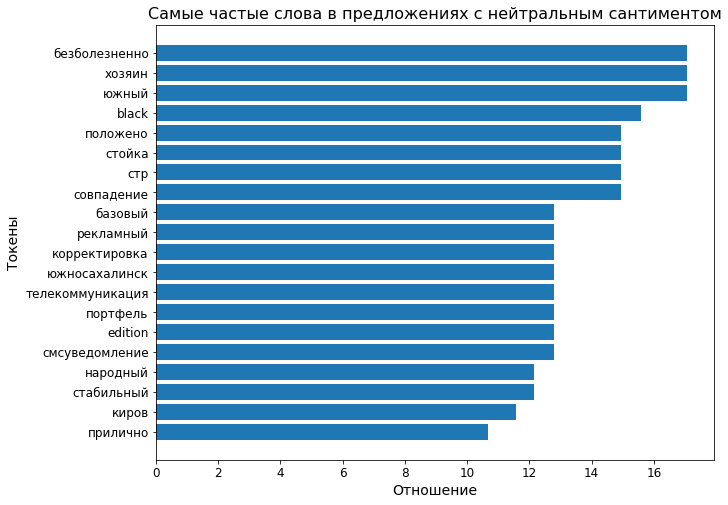

In [726]:
plt.figure(figsize=(10, 8))
plt.title('Самые частые слова в предложениях с нейтральным сантиментом', fontsize=16)
plt.barh(first_20_net_word[::-1], first_20_net_kol[::-1])
# plt.hist(freq_dict_sorted_good, orientation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Токены', fontsize=14)
plt.xlabel('Отношение', fontsize=14)
# plt.legend(fontsize=14)
plt.show()

# Доброжелательные слова:

In [708]:
import numpy as np

In [527]:
freq_dict_good = {}

for i, j in freq_dict_sorted.items():
    freq_dict_good[i] = j[0] / max(j[1], 1)

In [528]:
freq_dict_sorted_good =  dict(sorted(freq_dict_good.items(), key=lambda item: item[1], reverse=True))

In [529]:
first_20_good_word = []
first_20_good_kol = []

for i, j in freq_dict_sorted_good.items():
    first_20_good_word.append(i)
    first_20_good_kol.append(j)
    if len(first_20_good_word) == 20:
        break

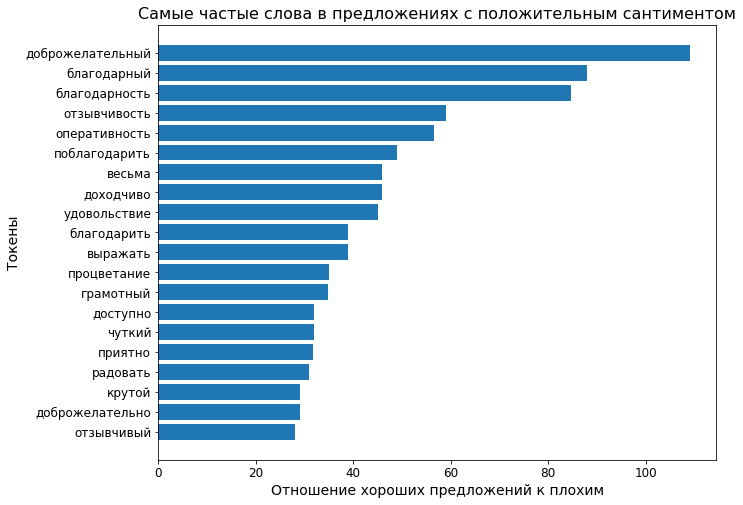

In [530]:
plt.figure(figsize=(10, 8))
plt.title('Самые частые слова в предложениях с положительным сантиментом', fontsize=16)
plt.barh(first_20_good_word[::-1], first_20_good_kol[::-1])
# plt.hist(freq_dict_sorted_good, orientation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Токены', fontsize=14)
plt.xlabel('Отношение хороших предложений к плохим', fontsize=14)
# plt.legend(fontsize=14)
plt.show()

# Негативные слова

In [531]:
freq_dict_bad = {}

for i, j in freq_dict_sorted.items():
    freq_dict_bad[i] = j[1] / max(j[0], 1)

In [532]:
freq_dict_sorted_bad =  dict(sorted(freq_dict_bad.items(), key=lambda item: item[1], reverse=True))

In [533]:
first_20_bad_word = []
first_20_bad_kol = []

for i, j in freq_dict_sorted_bad.items():
    first_20_bad_word.append(i)
    first_20_bad_kol.append(j)
    if len(first_20_bad_word) == 20:
        break

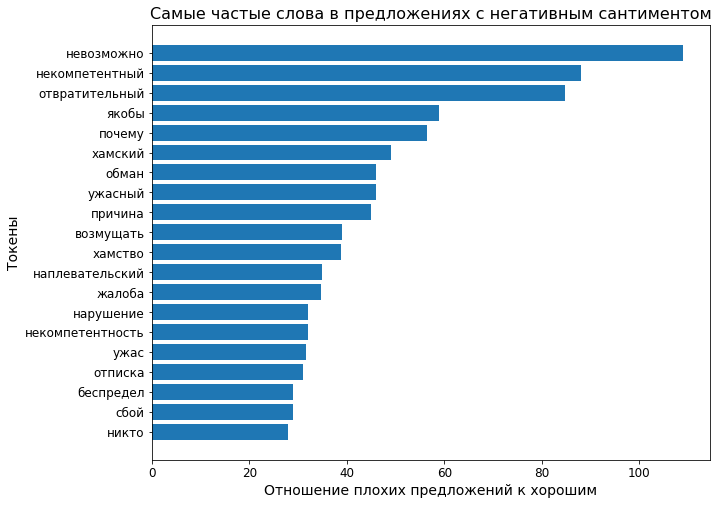

In [534]:
plt.figure(figsize=(10, 8))
plt.title('Самые частые слова в предложениях с негативным сантиментом', fontsize=16)
plt.barh(first_20_bad_word[::-1], first_20_good_kol[::-1])
# plt.hist(freq_dict_sorted_good, orientation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Токены', fontsize=14)
plt.xlabel('Отношение плохих предложений к хорошим', fontsize=14)
# plt.legend(fontsize=14)
plt.show()

# С препроцессингом

In [673]:
ds = pd.read_csv('/home/jupyter/mnt/s3/newbacketttt/train.csv')
ds = ds.drop('2category', axis = 1)
ds = ds.rename(columns = {'Unnamed: 0': 'id'})
df = ds['sentence'].copy()
# df_lemmatized = lemmatizing(df, WordNetLemmatizer()).copy()

df_no_punc = delete_punc(df)
df_filtered = del_stopwords(df_no_punc).copy()
df_no_dig = del_digits(df_filtered).copy() 
df_lemmatized = lemmatizing(df_no_dig, WordNetLemmatizer()).copy()
df_tokenized = tokenization(df_lemmatized).copy()
dictionary = form_dict(df_tokenized)

UnboundLocalError: local variable 'text_filtered' referenced before assignment

In [698]:
len(dictionary)

8691

0                    [при, получать, качественный, услуга]
1                   [не, видеть, хотя, поставлять, сервис]
2               [вот, мой, любимый, банк, мкб, обманывать]
3                      [отвратительный, отношение, клиент]
4        [всегда, любой, время, день, ночь, помогать, о...
                               ...                        
19356    [никогда, кой, случай, открывать, счет, недост...
19357    [ти, откровенно, забивать, качество, развивать...
19358    [я, считать, это, прорыв, лидерство, финансовы...
19359    [писать, мужчина, очень, доходчиво, финансовый...
19360    [данный, ситуация, сильно, выбивать, колея, вм...
Name: sentence, Length: 19361, dtype: object

# Без препроцессинга (только леммнинизация и токенизация)

In [507]:
ds = pd.read_csv('/home/jupyter/mnt/s3/newbacketttt/train.csv')
ds = ds.drop('2category', axis = 1)
ds = ds.rename(columns = {'Unnamed: 0': 'id'})
df = ds['sentence'].copy()

# df_no_punc = delete_punc(df)
# df_filtered = del_stopwords(df_no_punc).copy()
# df_no_dig = del_digits(df_filtered).copy() 
df_lemmatized = lemmatizing(df, WordNetLemmatizer()).copy()
df_tokenized = tokenization(df_lemmatized).copy()
dictionary = form_dict(df_tokenized)

In [508]:
len(dictionary)

9312

In [517]:
freq_dict = {}

# в скольки предложениях есть

for i in tqdm(dictionary):
    freq_dict[i] = [0, 0, 0] # хочу посмотреть, возможно какое-то слова чаще встречается в негативных или позитивных предложениях
    for num, j in enumerate(df_tokenized):
        if i in j:
            if ds['sentiment'][num] == '+':
                freq_dict[i][0] += 1
            elif ds['sentiment'][num] == '−':
                freq_dict[i][1] += 1
            else:
                freq_dict[i][2] += 1

100%|██████████| 9312/9312 [01:47<00:00, 86.60it/s]


In [518]:
freq_dict_sorted =  dict(sorted(freq_dict.items(), key=lambda item: sum(item[1]), reverse=True))

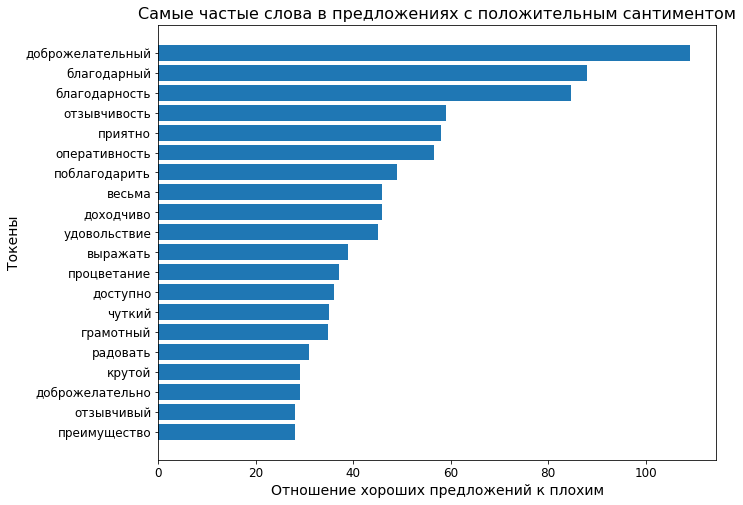

In [519]:
freq_dict_good = {}

for i, j in freq_dict_sorted.items():
    freq_dict_good[i] = j[0] / max(j[1], 1)
    
freq_dict_sorted_good =  dict(sorted(freq_dict_good.items(), key=lambda item: item[1], reverse=True))

first_20_good_word = []
first_20_good_kol = []

for i, j in freq_dict_sorted_good.items():
    first_20_good_word.append(i)
    first_20_good_kol.append(j)
    if len(first_20_good_word) == 20:
        break
        
plt.figure(figsize=(10, 8))
plt.title('Самые частые слова в предложениях с положительным сантиментом', fontsize=16)
plt.barh(first_20_good_word[::-1], first_20_good_kol[::-1])
# plt.hist(freq_dict_sorted_good, orientation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Токены', fontsize=14)
plt.xlabel('Отношение хороших предложений к плохим', fontsize=14)
# plt.legend(fontsize=14)
plt.show()

## Negative

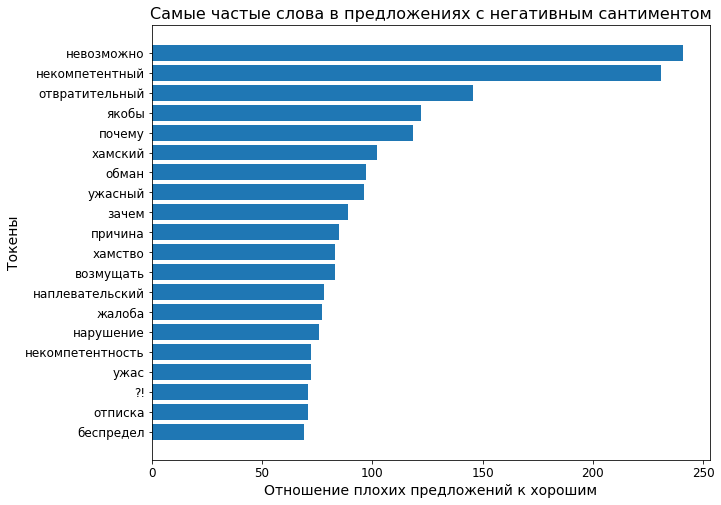

In [521]:
freq_dict_bad = {}

for i, j in freq_dict_sorted.items():
    freq_dict_bad[i] = j[1] / max(j[0], 1)
    
freq_dict_sorted_bad =  dict(sorted(freq_dict_bad.items(), key=lambda item: item[1], reverse=True))

first_20_bad_word = []
first_20_bad_kol = []

for i, j in freq_dict_sorted_bad.items():
    first_20_bad_word.append(i)
    first_20_bad_kol.append(j)
    if len(first_20_bad_word) == 20:
        break
        
plt.figure(figsize=(10, 8))
plt.title('Самые частые слова в предложениях с негативным сантиментом', fontsize=16)
plt.barh(first_20_bad_word[::-1], first_20_bad_kol[::-1])
# plt.hist(freq_dict_sorted_good, orientation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Токены', fontsize=14)
plt.xlabel('Отношение плохих предложений к хорошим', fontsize=14)
# plt.legend(fontsize=14)
plt.show()

# По категориям

In [730]:
category_freq_dict = {}

# в скольки предложениях 
# есть по категориям!!!

for i in tqdm(dictionary):
    category_freq_dict[i] = [0, 0, 0, 0, 0]
    for num, j in enumerate(df_tokenized):
        if i in j:
            if ds['1category'][num] == 'Communication':
                category_freq_dict[i][0] += 1
            elif ds['1category'][num] == 'Quality':
                category_freq_dict[i][1] += 1
            elif ds['1category'][num] == 'Price':
                category_freq_dict[i][2] += 1
            elif ds['1category'][num] == 'Safety':
                category_freq_dict[i][3] += 1
            else:
                category_freq_dict[i][4] += 1

100%|██████████| 8691/8691 [01:01<00:00, 142.00it/s]


# Communication

In [732]:
category_freq_dict_sorted =  dict(sorted(category_freq_dict.items(), key=lambda item: sum(item[1]), reverse=True))

In [752]:
category_freq_dict_sorted_comm = {}
for i, j in category_freq_dict_sorted.items():
    category_freq_dict_sorted_comm[i] = j[0] 

In [749]:
# category_freq_dict_sorted_comm =  dict(sorted(category_freq_dict.items(), key=lambda item: item[1][0], reverse=True))

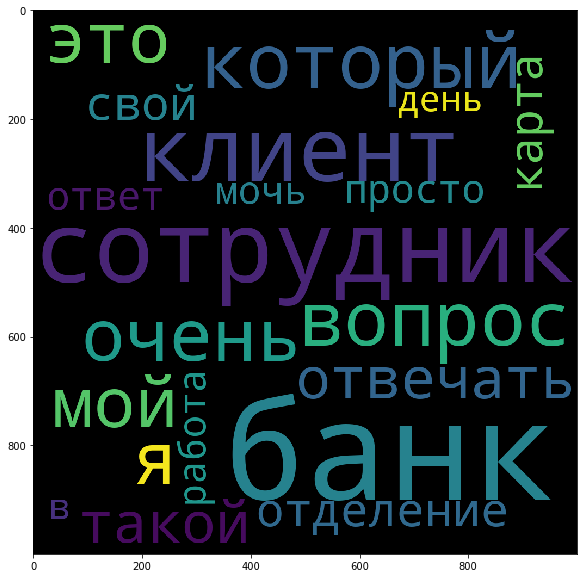

In [758]:
wc = WordCloud(width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(category_freq_dict_sorted_comm)
plt.figure(figsize=(10, 10))
plt.imshow(wc)

In [ ]:
freq_dict_comm = {}

for i, j in category_freq_dict_sorted.items():
    freq_dict_good[i] = j[0] / max(j[1], 1)
    
freq_dict_sorted_good =  dict(sorted(freq_dict_good.items(), key=lambda item: item[1], reverse=True))

first_20_good_word = []
first_20_good_kol = []

for i, j in freq_dict_sorted_good.items():
    first_20_good_word.append(i)
    first_20_good_kol.append(j)
    if len(first_20_good_word) == 20:
        break

In [772]:
# ? - 5926
# Communication	7193
# Price	366
# Quality	5630
# Safety	246

for i, j in category_freq_dict_sorted.items():
    category_freq_dict_sorted[i] = [j[0] / 7193, j[1] / 5630, j[2] / 366, j[3] / 246, j[4] / 5962]

In [782]:
# Communication

for i, j in category_freq_dict_sorted.items():
    c = 5
    con = 0.001
    if j[0] / max(j[1], con) >= c and j[0] / max(j[2], con) >= c and j[0] / max(j[3], con) >= c and j[0] / max(j[4], con) >= c:
        print(i, j)

дозваниваться [0.025024329208953148, 0.0037300177619893427, 0.00273224043715847, 0.0040650406504065045, 0.0001677289500167729]
хамский [0.012512164604476574, 0.0021314387211367673, 0.0, 0.0, 0.0]
хамить [0.010982900041707216, 0.0005328596802841918, 0.0, 0.0, 0.0]
разговаривать [0.00834144306965105, 0.0007104795737122557, 0.0, 0.0, 0.0010063737001006373]
голос [0.006534130404559989, 0.0007104795737122557, 0.0, 0.0, 0.0005031868500503186]
уведомлять [0.005421937995273182, 0.00035523978685612787, 0.0, 0.0, 0.0006709158000670916]
врать [0.005421937995273182, 0.00017761989342806393, 0.0, 0.0, 0.0003354579000335458]


# Price

In [778]:
# Price

for i, j in category_freq_dict_sorted.items():
    c = 12
    con = 0.001
    ind = 2
    if j[ind] / max(j[1], con) >= c and j[ind] / max(j[0], con) >= c and j[ind] / max(j[3], con) >= c and j[ind] / max(j[4], con) >= c:
        print(i, j)

ставка [0.006256082302238287, 0.006039076376554174, 0.13114754098360656, 0.0, 0.006205971150620597]
валюта [0.000834144306965105, 0.0017761989342806395, 0.0273224043715847, 0.0, 0.0008386447500838644]
процентный [0.0012512164604476575, 0.0010657193605683837, 0.01912568306010929, 0.0, 0.0011741026501174102]
приемлемый [0.0004170721534825525, 0.0017761989342806395, 0.02459016393442623, 0.0, 0.0010063737001006373]
рассчитывать [0.0009731683581259558, 0.0010657193605683837, 0.01639344262295082, 0.0, 0.0006709158000670916]
грабительский [0.00027804810232170165, 0.00017761989342806393, 0.0273224043715847, 0.0, 0.0001677289500167729]
аналогичный [0.0, 0.0005328596802841918, 0.01366120218579235, 0.0, 0.0008386447500838644]


# Safety

In [622]:
# Safety

for i, j in category_freq_dict_sorted.items():
    c = 5
    con = 0.01
    ind = 3
    if j[ind] / max(j[1], con) >= c and j[ind] / max(j[0], con) >= c and j[ind] / max(j[2], con) >= c and j[ind] / max(j[4], con) >= c:
        print(i, j)

действие [0.012651188655637425, 0.009769094138543518, 0.00819672131147541, 0.08130081300813008, 0.006709158000670915]
случай [0.009036563325455304, 0.008703374777975134, 0.00546448087431694, 0.056910569105691054, 0.010063737001006373]
данные [0.007646322813846795, 0.008703374777975134, 0.0, 0.09349593495934959, 0.0038577658503857765]
мошенник [0.004170721534825525, 0.002486678507992895, 0.0, 0.11788617886178862, 0.0021804763502180475]
безопасность [0.004170721534825525, 0.003019538188277087, 0.0, 0.12195121951219512, 0.0001677289500167729]


# Quality

In [775]:
# Quality

for i, j in category_freq_dict_sorted.items():
    c = 3.5
    con = 0.001
    ind = 1
    if j[ind] / max(j[3], con) >= c and j[ind] / max(j[0], con) >= c and j[ind] / max(j[2], con) >= c and j[ind] / max(j[4], con) >= c:
        print(i, j)

функция [0.0006951202558042541, 0.00497335701598579, 0.0, 0.0, 0.0011741026501174102]
подводить [0.0009731683581259558, 0.004262877442273535, 0.0, 0.0, 0.0006709158000670916]
бегать [0.0005560962046434033, 0.003552397868561279, 0.0, 0.0, 0.0010063737001006373]
вход [0.0009731683581259558, 0.003552397868561279, 0.0, 0.0, 0.0005031868500503186]
интернетбанкинг [0.0004170721534825525, 0.004440497335701598, 0.0, 0.0, 0.0001677289500167729]
интерфейс [0.0004170721534825525, 0.003907637655417406, 0.0, 0.0, 0.0001677289500167729]


In [633]:
# ?

for i, j in category_freq_dict_sorted.items():
    c = 10
    con = 0.0001
    ind = 4
    if j[ind] / max(j[3], con) >= c and j[ind] / max(j[0], con) >= c and j[ind] / max(j[2], con) >= c and j[ind] / max(j[1], con) >= c:
        print(i, j)

суток [0.0, 0.0, 0.0, 0.0, 0.0013418316001341832]
корректировка [0.0, 0.0, 0.0, 0.0, 0.0011741026501174102]
весна [0.0, 0.0, 0.0, 0.0, 0.0011741026501174102]
premier [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]
оченьочень [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]
портфель [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]
edition [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]
opencard [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]
президент [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]
владислав [0.0, 0.0, 0.0, 0.0, 0.0010063737001006373]


# WordCloud

In [642]:
df = pd.read_csv('/home/jupyter/mnt/s3/newbacketttt/train_new.csv')

In [700]:
df_tokenized

0                    [при, получать, качественный, услуга]
1                   [не, видеть, хотя, поставлять, сервис]
2               [вот, мой, любимый, банк, мкб, обманывать]
3                      [отвратительный, отношение, клиент]
4        [всегда, любой, время, день, ночь, помогать, о...
                               ...                        
19356    [никогда, кой, случай, открывать, счет, недост...
19357    [ти, откровенно, забивать, качество, развивать...
19358    [я, считать, это, прорыв, лидерство, финансовы...
19359    [писать, мужчина, очень, доходчиво, финансовый...
19360    [данный, ситуация, сильно, выбивать, колея, вм...
Name: sentence, Length: 19361, dtype: object

In [762]:
all_text = ""
for i in df_tokenized:
    all_text += " ".join(i) + " "

In [763]:
all_text[:1000]

'при получать качественный услуга не видеть хотя поставлять сервис вот мой любимый банк мкб обманывать отвратительный отношение клиент всегда любой время день ночь помогать отвечать решать весь время согласовываться все делаться быстро абсолютный бездействие нежелание банк работать клиент первый операция внесение руб успешно выполнять ну почему должный звонить платить деньги музыка плохой качество который нужный получать карта кредит карман два бесплатный карта банк карман довольный хотеть выражать огромный благодарность екатерина ввой кредитный специалист альфабанка понимание высокопрофессиональный подход оперативный работа сфера кредитование юридический лицо пользоваться карта граница включая слип безотказно впечатление хороший каждый год становиться да целое довольный банк удивлять хамить телефон поклон ситибанка доставать реклама поклон ситибанка обманывать условие поклон ситибанка прочий с газпромбанк связываться столько нерв отнимать деньги мелочь думать шумок замечать я достаточ

In [635]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458 kB 1.7 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [736]:
from wordcloud import WordCloud

(-0.5, 1399.5, 999.5, -0.5)

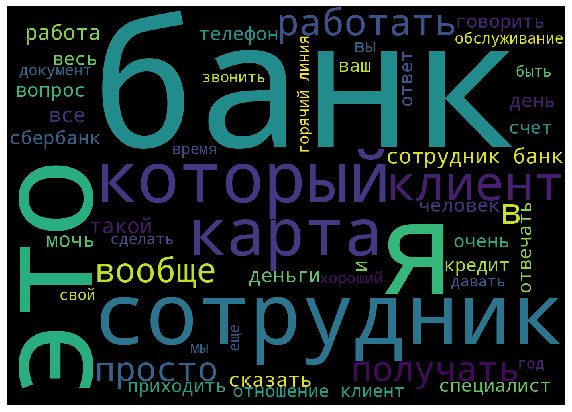

In [767]:
cloud = WordCloud(width=1400,height=1000, max_words=50).generate(all_text)
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')

In [741]:
from os import path

In [768]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
cloud.to_file(path.join(d, "allwords.png"))